<a href="https://colab.research.google.com/github/cnwokoye1/Startup-Success-EDA/blob/main/A1_EDA_Nwokoye_Christopher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Project Overview
##### This project explores a dataset of startups founded within the last two decades. The data includes geographic information, funding history, milestone achievements, and each startup's eventual status (e.g., acquired, closed).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving startup_info_.csv to startup_info_.csv


### 2. Importing Libraries
##### In this section, I import the core libraries needed for data manipulation, visualization, and preprocessing.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Load Dataset and Inspect Shape
##### After loading the dataset into a pandas DataFrame, the first step is to examine the number of rows and columns and preview the data structure.

In [4]:
startup_info = pd.read_csv("/content/startup_info_.csv", index_col = 0)

rows = len(startup_info.axes[0])
cols = len(startup_info.axes[1])

print(startup_info)
print("Number of rows: ", rows)
print("Number of columns: ", cols)


           state_code   latitude   longitude zip_code       id           city  \
Unnamed: 0                                                                      
1005               CA  42.358880  -71.056820    92101   c:6669      San Diego   
204                CA  37.238916 -121.973718    95032  c:16283      Los Gatos   
1001               CA  32.901049 -117.192656    92121  c:65620      San Diego   
738                CA  37.320309 -122.050040    95014  c:42668      Cupertino   
1002               CA  37.779281 -122.419236    94105  c:65806  San Francisco   
...               ...        ...         ...      ...      ...            ...   
352                CA  37.740594 -122.376471    94107  c:21343  San Francisco   
721                MA  42.504817  -71.195611     1803  c:41747     Burlington   
557                CA  37.408261 -122.015920    94089  c:31549      Sunnyvale   
589                CA  37.556732 -122.288378    94404  c:33198  San Francisco   
462                CA  37.38

### 4. Summary Statistics
##### Using describe(), I generate summary statistics to understand distributions, central tendencies, and basic numeric properties of the dataset.
##### This helps identify skewed distributions, potential outliers, and ranges for numerical features.

In [5]:
print(startup_info.describe())

         latitude   longitude      labels  age_first_funding_year  \
count  923.000000  923.000000  923.000000              923.000000   
mean    38.517442 -103.539212    0.646804                2.235630   
std      3.741497   22.394167    0.478222                2.510449   
min     25.752358 -122.756956    0.000000               -9.046600   
25%     37.388869 -122.198732    0.000000                0.576700   
50%     37.779281 -118.374037    1.000000                1.446600   
75%     40.730646  -77.214731    1.000000                3.575350   
max     59.335232   18.057121    1.000000               21.895900   

       age_last_funding_year  age_first_milestone_year  \
count             923.000000                771.000000   
mean                3.931456                  3.055353   
std                 2.967910                  2.977057   
min                -9.046600                -14.169900   
25%                 1.669850                  1.000000   
50%                 3.528800  

### 5. Inspecting Columns & Dropping Irrelevant Features
##### Some columns in the dataset are duplicate identifiers, indexing artifacts, or provide no analytical value (e.g., Unnamed: 0, Unnamed: 6, state_code.1, object_id).
##### These are removed to streamline the dataset and reduce noise.

In [6]:
print(startup_info.columns)

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city',
       'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'avg_participants', 'is_top500', 'status'],
      dtype='object')


In [7]:
cols_to_drop = ['Unnamed: 0', 'Unnamed: 6', 'state_code.1', 'object_id']

for col in cols_to_drop:
    if col in startup_info.columns:
        startup_info.drop(col, axis=1, inplace=True)

### 6. Working with Numerical Features

#### 6.1 Seleting Numeric Columns
##### Here, numeric columns are extracted into a separate DataFrame to simplify analysis.

In [8]:
# List of columns you want to drop
columns_to_exclude = ['state_code', 'city', 'Unnamed: 6', 'name', 'state_code.1', 'category_code', 'status']

# Use list comprehension to get only the columns you want to keep
columns_to_keep = [col for col in startup_info.columns if col not in columns_to_exclude]

# Use .loc to select only the desired columns
startup_info_2 = startup_info.loc[:, columns_to_keep]

# Preview the result
print(startup_info_2.head())

             latitude   longitude zip_code       id  labels founded_at  \
Unnamed: 0                                                               
1005        42.358880  -71.056820    92101   c:6669       1   1/1/2007   
204         37.238916 -121.973718    95032  c:16283       1   1/1/2000   
1001        32.901049 -117.192656    92121  c:65620       1  3/18/2009   
738         37.320309 -122.050040    95014  c:42668       1   1/1/2002   
1002        37.779281 -122.419236    94105  c:65806       0   8/1/2010   

            closed_at first_funding_at last_funding_at  \
Unnamed: 0                                               
1005              NaN         4/1/2009        1/1/2010   
204               NaN        2/14/2005      12/28/2009   
1001              NaN        3/30/2010       3/30/2010   
738               NaN        2/17/2005       4/25/2007   
1002        10/1/2012         8/1/2010        4/1/2012   

            age_first_funding_year  age_last_funding_year  \
Unnamed: 0   

#### 6.2 Distribution Analysis & Skewness
##### I plot histograms of all numeric variables to visualize their distributions. Skewness values are calculated to quantify the direction and magnitude of skew.
##### This step helps identify variables that may require transformation prior to modeling (e.g., log-scaling heavily right-skewed features).

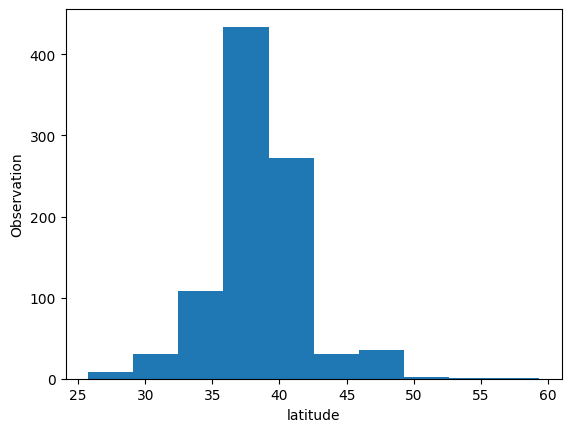

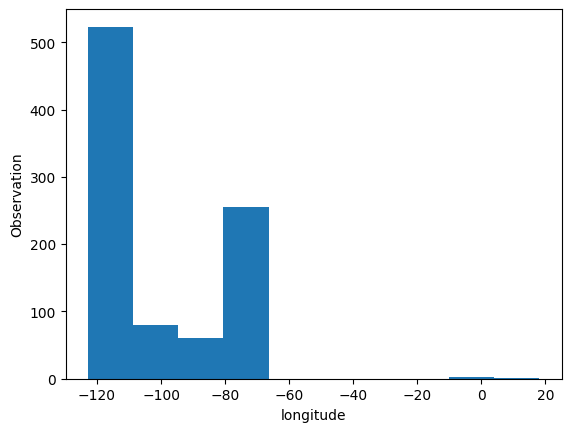

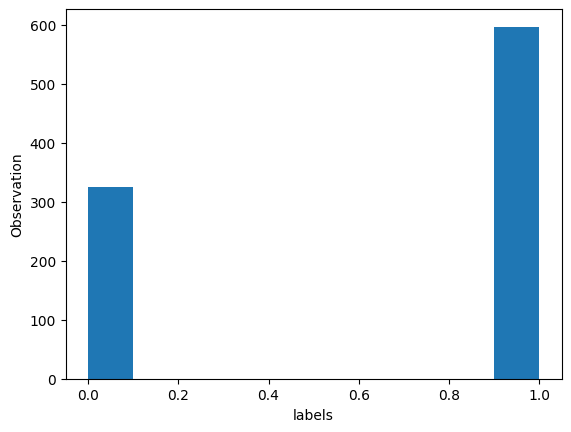

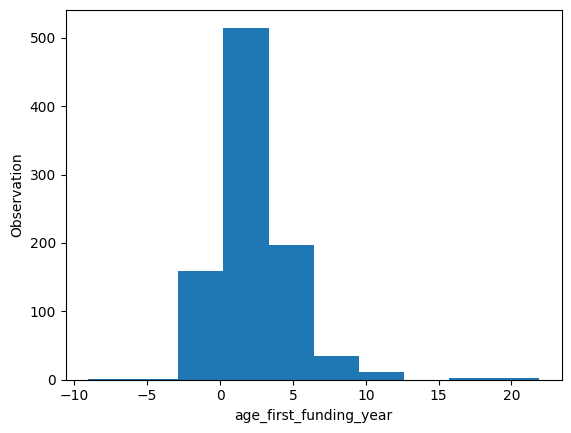

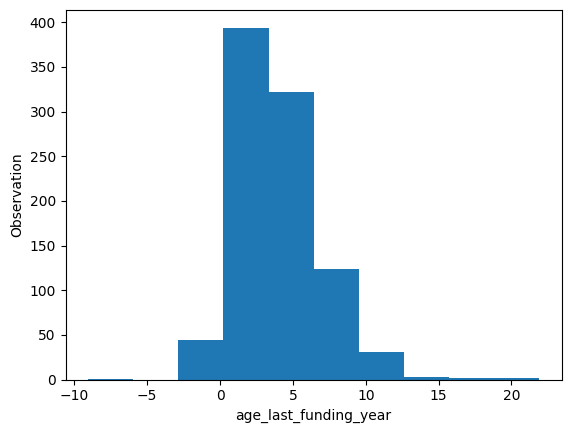

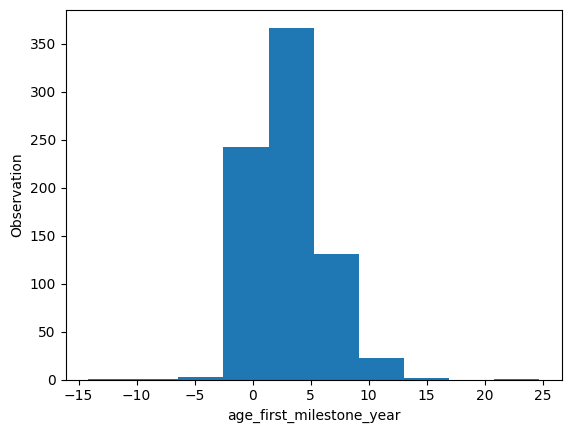

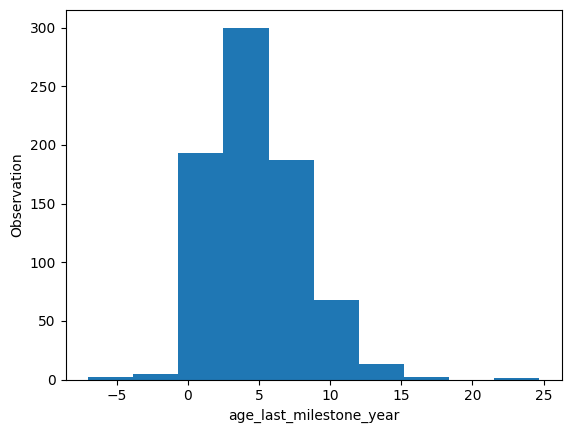

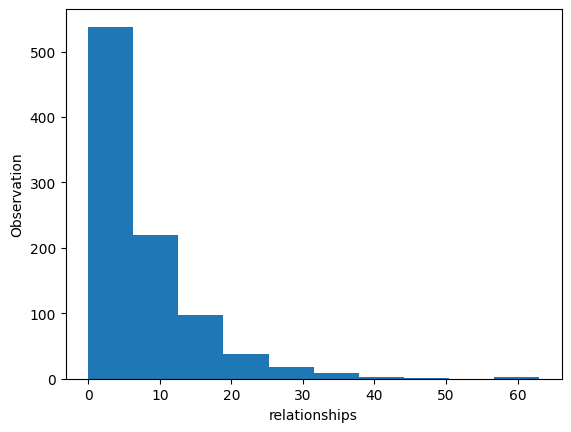

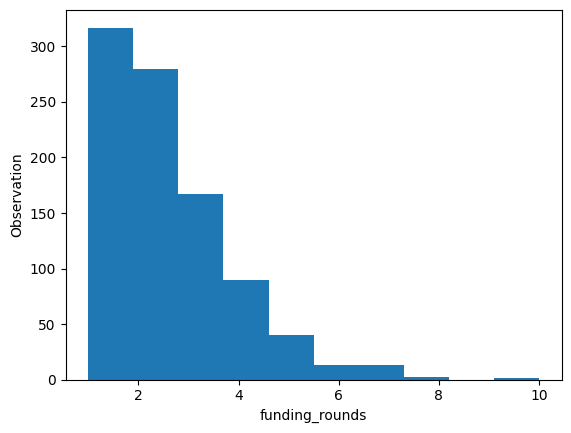

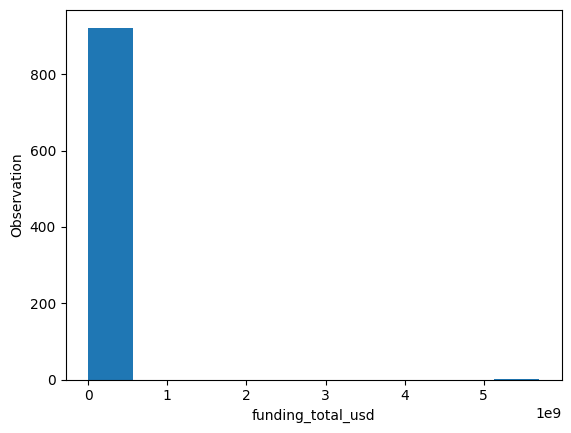

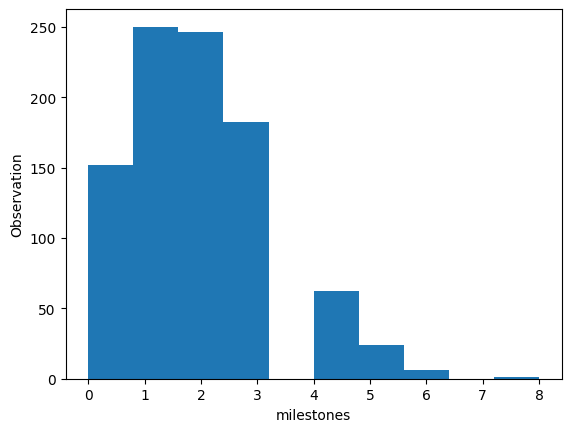

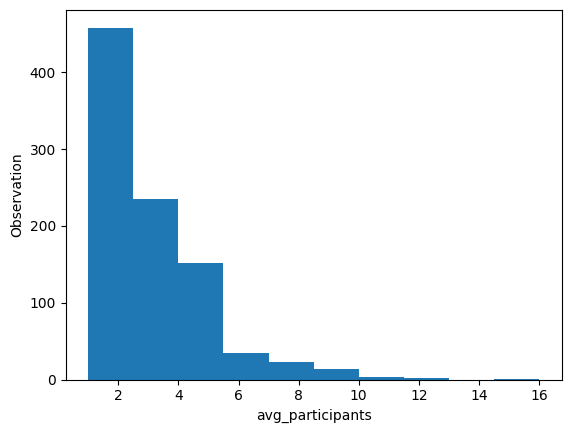

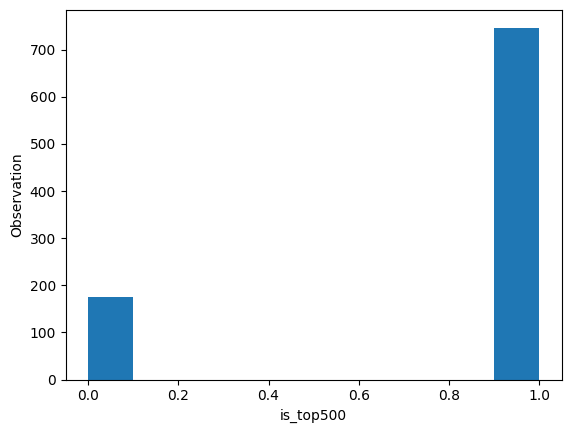

latitude                     0.309298
longitude                    0.873708
labels                      -0.615290
age_first_funding_year       2.104001
age_last_funding_year        1.092075
age_first_milestone_year     0.944468
age_last_milestone_year      0.711934
relationships                2.329961
funding_rounds               1.356917
funding_total_usd           29.152461
milestones                   0.577378
avg_participants             1.767554
is_top500                   -1.577343
dtype: float64


In [9]:
# Iterate over numerical columns and plot histogram for each
for col in startup_info_2.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots()
    ax.hist(startup_info_2[col])
    ax.set_xlabel(col)
    ax.set_ylabel("Observation")
    plt.show()

# Print skew for all numerical features
print(startup_info_2.select_dtypes(include=np.number).skew())

### 7. Extracting Categorical Features
##### Categorical variables are separated to allow targeted analyses such as frequency  counts and categorical vizualizations.

In [10]:
startup_info_3 = startup_info.loc[:, ['category_code']]

### 8. Missing Value Analysis

#### 8.1 Missing Value Counts
##### I compute the number of missing values for each column and display them in descending order. This helps prioritize which fields require handling.

In [11]:
print("List with column-wise count of missing values in descending order: \n", startup_info.isnull().sum().sort_values(ascending = False))

List with column-wise count of missing values in descending order: 
 closed_at                   588
age_last_milestone_year     152
age_first_milestone_year    152
state_code                    0
id                            0
latitude                      0
longitude                     0
zip_code                      0
labels                        0
name                          0
city                          0
founded_at                    0
last_funding_at               0
first_funding_at              0
age_last_funding_year         0
age_first_funding_year        0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
avg_participants              0
is_top500                     0
status                        0
dtype: int64


#### 8.2 Missing Value Percentages
##### Converting counts to percentages provides better intuition for how much of each feature is missing.

In [12]:
# store percent missing
percent_missing = startup_info.isnull().sum() * 100 / len(startup_info)

# print percent missing
print("Column-wise percentage of missing values: ", percent_missing)

Column-wise percentage of missing values:  state_code                   0.000000
latitude                     0.000000
longitude                    0.000000
zip_code                     0.000000
id                           0.000000
city                         0.000000
name                         0.000000
labels                       0.000000
founded_at                   0.000000
closed_at                   63.705309
first_funding_at             0.000000
last_funding_at              0.000000
age_first_funding_year       0.000000
age_last_funding_year        0.000000
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
relationships                0.000000
funding_rounds               0.000000
funding_total_usd            0.000000
milestones                   0.000000
category_code                0.000000
avg_participants             0.000000
is_top500                    0.000000
status                       0.000000
dtype: float64


#### 8.3 Visualizing Missingness
##### A bar plot of missing values is generated to quickly identify sparse columns. This is especially useful when deciding whether to impute, drop, or leave missing values as meaningful.

/tmp/ipython-input-521757706.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_cols.index, rotation=90)


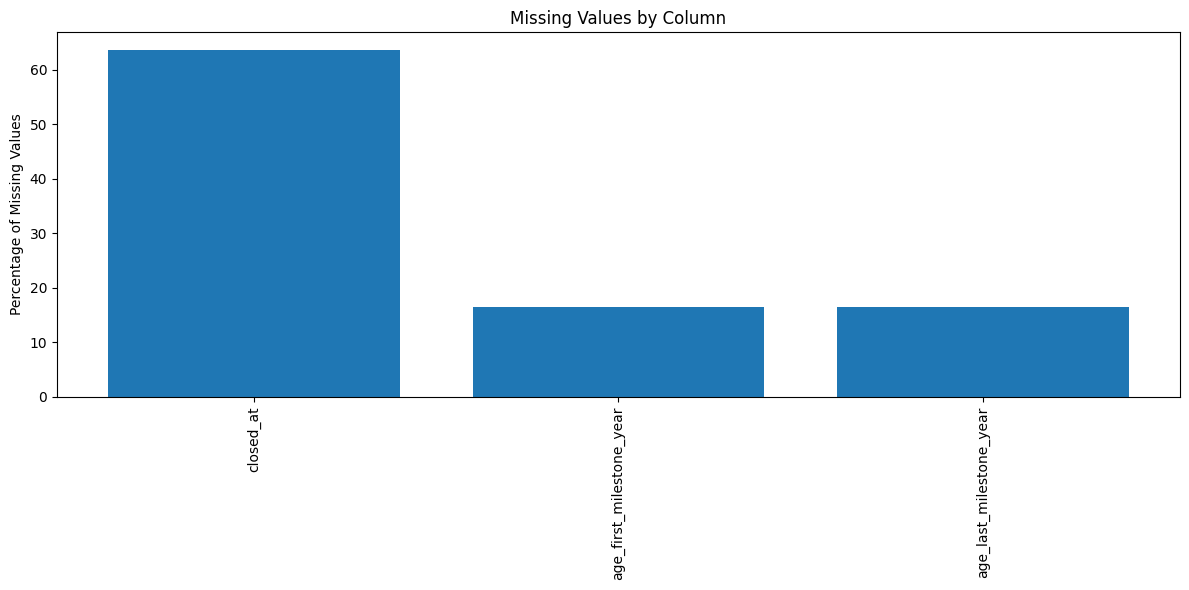

In [13]:
# Calculate percentage of missing values for each column
percent_missing = startup_info.isnull().sum() * 100 / len(startup_info)

# Filter columns with missing values
missing_cols = percent_missing[percent_missing > 0]

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size if needed
ax.bar(missing_cols.index, missing_cols.values)
ax.set_xticklabels(missing_cols.index, rotation=90)
ax.set_ylabel("Percentage of Missing Values")
ax.set_title("Missing Values by Column")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

### 9. Label Encoding
##### The status column contains categorical values representing startup outcomes. To prepare it for modeling, I encode it into 0-1 numeric form using scikit-learn's LabelEncoder.

In [14]:
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
le = LabelEncoder()

# encode 'status' column
startup_info.status = le.fit_transform(startup_info.status)

# show transformation
startup_info.head

<bound method NDFrame.head of            state_code   latitude   longitude zip_code       id           city  \
Unnamed: 0                                                                      
1005               CA  42.358880  -71.056820    92101   c:6669      San Diego   
204                CA  37.238916 -121.973718    95032  c:16283      Los Gatos   
1001               CA  32.901049 -117.192656    92121  c:65620      San Diego   
738                CA  37.320309 -122.050040    95014  c:42668      Cupertino   
1002               CA  37.779281 -122.419236    94105  c:65806  San Francisco   
...               ...        ...         ...      ...      ...            ...   
352                CA  37.740594 -122.376471    94107  c:21343  San Francisco   
721                MA  42.504817  -71.195611     1803  c:41747     Burlington   
557                CA  37.408261 -122.015920    94089  c:31549      Sunnyvale   
589                CA  37.556732 -122.288378    94404  c:33198  San Francisco   
462                CA  37.386778 -121.966277    95054  c:26702    Santa Clara   

                            name  labels founded_at  closed_at  ...  \
Unnamed: 0                                                      ...   
1005                 Bandsintown       1   1/1/2007        NaN  ...   
204                    TriCipher       1   1/1/2000        NaN  ...   
1001                       Plixi       1  3/18/2009        NaN  ...   
738            Solidcore Systems       1   1/1/2002        NaN  ...   
1002              Inhale Digital       0   8/1/2010  10/1/2012  ...   
...                          ...     ...        ...        ...  ...   
352                      CoTweet       1   1/1/2009        NaN  ...   
721           Reef Point Systems       0   1/1/1998  6/25/2008  ...   
557              Paracor Medical       0   1/1/1999  6/17/2012  ...   
589                      Causata       1   1/1/2009        NaN  ...   
462         Asempra Technologies       1   1/1/2003        NaN  ...   

           age_first_milestone_year age_last_milestone_year  relationships  \
Unnamed: 0                                                                   
1005                         4.6685                  6.7041              3   
204                          7.0055                  7.0055              9   
1001                         1.4575                  2.2055              5   
738                          6.0027                  6.0027              5   
1002                         0.0384                  0.0384              2   
...                             ...                     ...            ...   
352                          0.5808                  4.5260              9   
721                          6.0027                  6.0027              1   
557                          9.0055                  9.0055              5   
589                          0.7589                  3.8356             12   
462                          4.0027                  4.0027              4   

            funding_rounds  funding_total_usd  milestones  category_code  \
Unnamed: 0                                                                 
1005                     3             375000           3          music   
204                      4           40100000           1     enterprise   
1001                     1            2600000           2            web   
738                      3           40000000           1       software   
1002                     2            1300000           1    games_video   
...                    ...                ...         ...            ...   
352                      1            1100000           2    advertising   
721                      3           52000000           1       security   
557                      1           44000000           1        biotech   
589                      2           15500000           2       software   
462                      1           20000000           1       s

### 10. Correlation Analysis
##### A correlation matrix and heatmap are generated to:
##### - Identify relationships between numeric features
##### - Detect multicollinearity
##### - Understand which attributes most strongly correlate with success indicators or funding activity
##### This is an important step when preparing a dataset for supervised learning.

                          latitude  longitude    labels  \
latitude                  1.000000   0.368475  0.046560   
longitude                 0.368475   1.000000 -0.036092   
labels                    0.046560  -0.036092  1.000000   
age_first_funding_year   -0.046868  -0.014158 -0.075637   
age_last_funding_year    -0.041692  -0.000148  0.073731   
age_first_milestone_year -0.072000  -0.051674  0.162279   
age_last_milestone_year  -0.054275  -0.087701  0.265871   
relationships            -0.039198  -0.073197  0.360434   
funding_rounds           -0.000659   0.022447  0.206049   
funding_total_usd        -0.072941   0.017970  0.040176   
milestones                0.017708  -0.016420  0.328260   
avg_participants         -0.018176  -0.045191  0.185992   
is_top500                 0.032675  -0.091913  0.310652   

                          age_first_funding_year  age_last_funding_year  \
latitude                               -0.046868              -0.041692   
longitude              

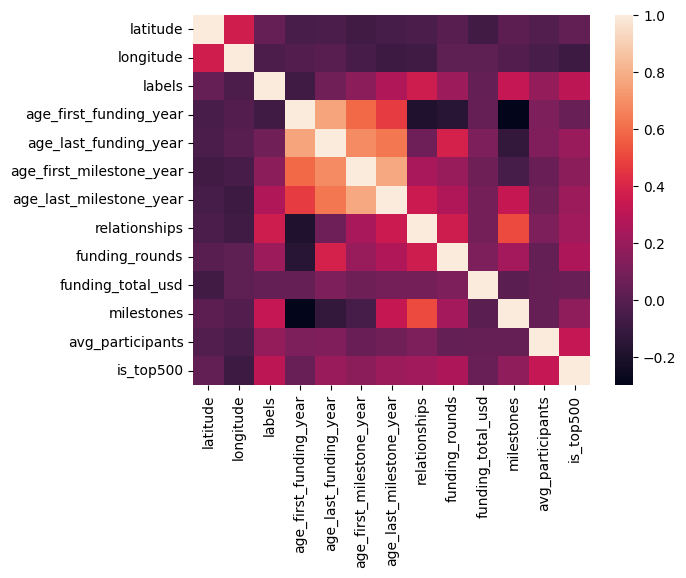

In [15]:
# print data of numeric columns that will be plotted
# Convert 'latitude' and 'longitude' columns to numeric, handling errors
startup_info_2['latitude'] = pd.to_numeric(startup_info_2['latitude'], errors='coerce')
startup_info_2['longitude'] = pd.to_numeric(startup_info_2['longitude'], errors='coerce')

# Exclude columns with non-numeric data like zip codes
numeric_columns = startup_info_2.select_dtypes(include=np.number).columns
startup_info_numeric = startup_info_2[numeric_columns]

print(startup_info_numeric.corr())

# plot correlation heatmap
dataplot = sns.heatmap(startup_info_numeric.corr())

# show heatmap
plt.show()

### 11. Categorical Visualizations

#### 11.1 State vs Success Labels
##### A countplot shows how startup success varies across states. This highlights geographic trends, such as the high concentration of successful startups in California.

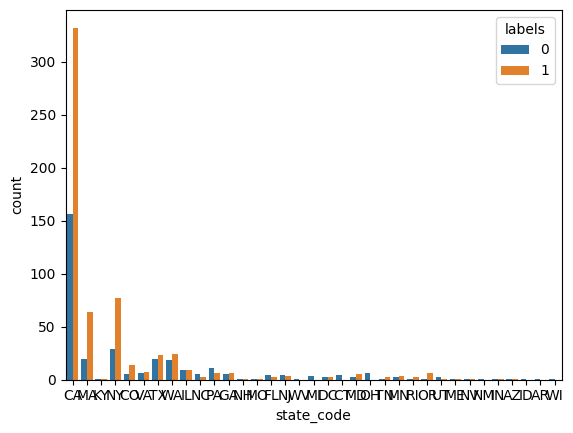

In [16]:
# visualization between 'state_code' & 'labels' using seaborn countplot
sns.countplot(x='state_code', hue='labels', data=startup_info)

# show plot
plt.show()

#### 11.2 Milestones vs Success Labels
##### This visualization examines whether milestone counts relate to startup success, revealing patterns between operational achievement and outcomes.

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'avg_participants', 'is_top500', 'status'],
      dtype='object')


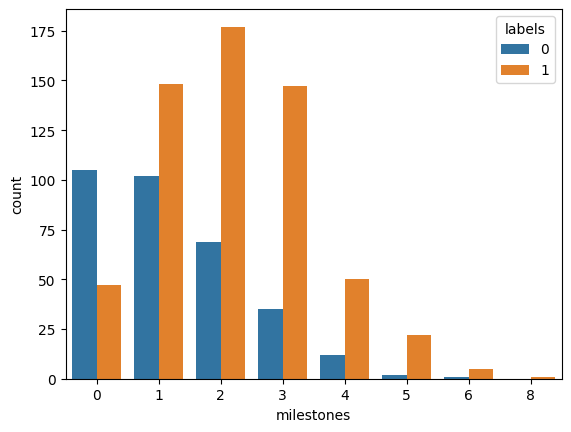

In [17]:
# visualization between 'milestone' & 'labels' using seaborn countplot
# Check if 'milestones' column exists in the DataFrame
print(startup_info.columns)  # Print columns to verify

# If 'milestones' column exists, use it. Otherwise, handle the error.
if 'milestones' in startup_info.columns:
    sns.countplot(x='milestones', hue='labels', data=startup_info)
else:
    print("Error: 'milestones' column not found in the DataFrame.")
    # You might want to investigate why the column is missing
    # and potentially load or process the data again.

# show plot
plt.show()

### 12. Removing Duplicate Records
##### Duplicate entries are removed in-place to ensure each row represents a unique startup. The new shape of the dataset is displayed after cleanup.

In [18]:
display(startup_info.drop_duplicates())

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,avg_participants,is_top500,status
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,4.6685,6.7041,3,3,375000,3,music,1.0000,0,0
204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,7.0055,7.0055,9,4,40100000,1,enterprise,4.7500,1,0
1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,1.4575,2.2055,5,1,2600000,2,web,4.0000,1,0
738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,6.0027,6.0027,5,3,40000000,1,software,3.3333,1,0
1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,0.0384,0.0384,2,2,1300000,1,games_video,1.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,1/1/2009,NaN,...,0.5808,4.5260,9,1,1100000,2,advertising,6.0000,1,0
721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,...,6.0027,6.0027,1,3,52000000,1,security,2.6667,1,1
557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,...,9.0055,9.0055,5,1,44000000,1,biotech,8.0000,1,1


### 13. Feature Correlation with Funding Rounds
##### I identify the variable with the highest correlation to funding_rounds and create a scatterplot to visualize their relationship.
##### This helps highlight potential predictors of funding activity.

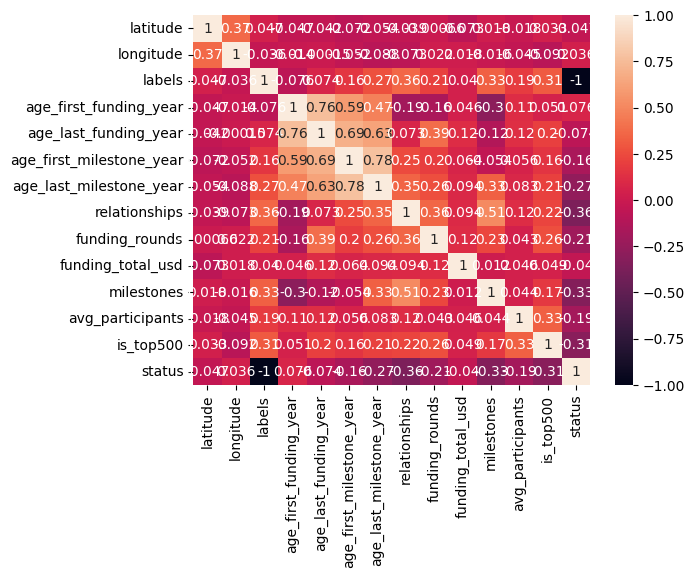

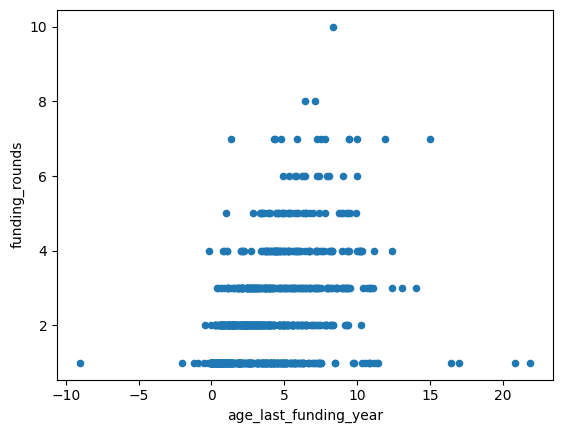

In [19]:
# Calculate the correlation matrix for numeric features
# Exclude non-numeric columns before calculating correlation
numeric_columns = startup_info.select_dtypes(include=np.number).columns
correlation_matrix = startup_info[numeric_columns].corr()

# Create the heatmap using the correlation matrix
highest_corr = sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Find the feature with the highest correlation with 'funding_rounds'
# Ensure the highest_corr_feature is in the numeric columns
highest_corr_feature = correlation_matrix['funding_rounds'].sort_values(ascending=False).index[1]  # Exclude 'funding_rounds' itself
if highest_corr_feature not in numeric_columns:
    # Handle the case where the highest correlation is with a non-numeric column
    print(f"Warning: Highest correlation is with non-numeric column '{highest_corr_feature}'. Skipping scatterplot.")
else:
    # Create a scatterplot
    startup_info.plot.scatter(x=highest_corr_feature, y='funding_rounds')
    plt.show()

## 14. Show boxplots for the numeric features to detect outliers. (4pt)

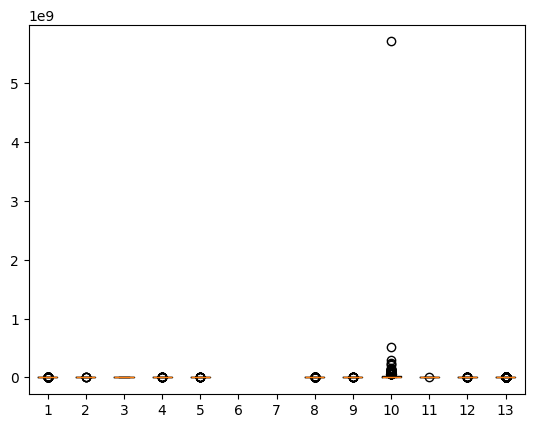

In [20]:
#TODO

# boxplot of dataframe of numerical columns
# Convert 'latitude' and 'longitude' columns to numeric, handling errors
startup_info_2['latitude'] = pd.to_numeric(startup_info_2['latitude'], errors='coerce')
startup_info_2['longitude'] = pd.to_numeric(startup_info_2['longitude'], errors='coerce')

# Exclude columns with non-numeric data like zip codes
numeric_columns = startup_info_2.select_dtypes(include=np.number).columns
startup_info_numeric = startup_info_2[numeric_columns]

plt.boxplot(startup_info_numeric)


# show plot
plt.show()

## 15. Summary and Discussion: Mention what additional steps are required to use this dataset in a binary classifier. Eg: any column to remove, any record to remove, any distribution to rebalance, any features to be joined together to generate new feature etc. (2pt)

#####TODO

First, we'd have to define explanatory and target variables. Second, split the dataset into training and testing sets. Third, normalize the data for numerical stability. Fourth, fit a logistic regression model to the training data. Fifth, make predictions on the testing data. Lastly, calculate the accuracy score by comparing the actual values and predicted values.

